In [21]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
data2014_2018 = pd.read_csv("avalik_2.csv",sep="\t")
data2019 = pd.read_csv("avalik_1.csv",sep="\t")
data2019 = data2019[data2019["ToimKpv"].str.contains("2019")]

# Removing unnecessary columns
data2014_2018 = data2014_2018.drop(["JuhtumId","SyndmusTaiendavStatLiik","Seadus","Paragrahv","ParagrahvTais","Loige","Kahjusumma","KohtLiik","KohtNimetus","SyyteoLiik"],axis=1)
data2019 = data2019.drop(["JuhtumId","SyndmusTaiendavStatLiik","Seadus","Paragrahv","ParagrahvTais","Loige","Kahjusumma","KohtLiik","KohtNimetus","SyyteoLiik"],axis=1)

data = pd.concat([data2014_2018,data2019],ignore_index=True)
data

# Converting L-EST coordinate system to GEO system. (Page used: https://www.maaamet.ee/rr/geo-lest/)
#x_lest = data[["Lest_X"]].copy(deep=True)
#y_lest = data[["Lest_Y"]].copy(deep=True)

#for i in range(len(x_lest)):
#    x_lest.iloc[i, 0] = str(x_lest.iloc[i, 0]).split("-")[0]
    
#for i in range(len(x_lest)):
#    y_lest.iloc[i, 0] = str(y_lest.iloc[i, 0]).split("-")[0]

#x_lest["Lest_Y"] = y_lest["Lest_Y"].values

#x_lest.to_csv("oigedKordinaadid.csv", index=None, header=False)
######################################################################

cords = pd.read_csv("kordinaadid.txt", sep=",", header=None, names=["X", "Y", "n"])
cords = cords.drop(columns='n')
cords

data["X_cord"] = cords["X"].values
data["Y_cord"] = cords["Y"].values
data

##data.to_csv("data_of_all_years_with_cords.csv", index = None, header=True, encoding="utf-8-sig", date_format="%Y-%m-%d")


ToimKpv ToimKell ToimNadalapaev  \
0      2018-12-31    23:50      Esmaspäev   
1      2018-12-31    23:40      Esmaspäev   
2      2018-12-31    23:00      Esmaspäev   
3      2018-12-31    20:55      Esmaspäev   
4      2018-12-31    18:10      Esmaspäev   
...           ...      ...            ...   
55669  2019-01-01    00:30      Teisipäev   
55670  2019-01-01    00:00      Teisipäev   
55671  2019-01-01    00:00      Teisipäev   
55672  2019-01-01    00:00      Teisipäev   
55673  2019-01-01      NaN      Teisipäev   

                                           SyndmusLiik MaakondNimetus  \
0                                            VANDALISM  Harju maakond   
1      AVALIKU_KORRA_RIKKUMINE,KEHALINE_VAARKOHTLEMINE  Harju maakond   
2                                               VARGUS  Harju maakond   
3        AVALIKU_KORRA_RIKKUMINE,POMMIAHVARDUS_KAHTLUS  Harju maakond   
4                                               VARGUS  Harju maakond   
...                                                ...            ...   
55669                                           VARGUS  Harju maakond   
55670                          AVALIKU_KORRA_RIKKUMINE  Rapla maakond   
55671                                        VANDALISM  Harju maakond   
55672                                           VARGUS  Harju maakond   
55673                                              MUU  Harju maakond   

      ValdLinnNimetus           Lest_X         Lest_Y     X_cord     Y_cord  
0             Tallinn  6588000-6588499  541500-541999  59.427824  24.731139  
1             Tallinn  6585500-6585999  538000-538499  59.405713  24.669042  
2             Tallinn  6589000-6589499  542500-542999  59.436701  24.748952  
3             Tallinn  6590000-6590499  540000-540499  59.445920  24.705085  
4             Tallinn  6589000-6589499  543500-543999  59.436599  24.766573  
...               ...              ...            ...        ...        ...  
55669         Tallinn  6588000-6588499  541500-541999  59.427824  24.731139  
55670      Rapla linn  6541000-6541999  545000-545999  59.005581  24.783129  
55671         Tallinn  6590000-6590499  550000-550499  59.444858  24.881337  
55672         Tallinn  6589000-6589499  543500-543999  59.436599  24.766573  
55673         Tallinn  6586000-6586499  539000-539499  59.410110  24.686737  

[55674 rows x 10 columns]

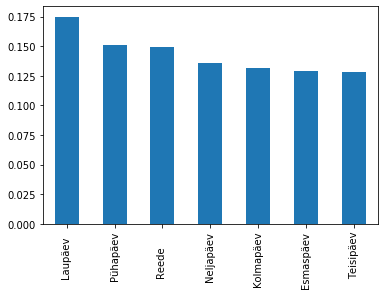

In [22]:
# Day of the week
koopia = data.copy()
counts = koopia["ToimNadalapaev"].value_counts()
counts = counts/sum(counts)
counts.plot(kind='bar')

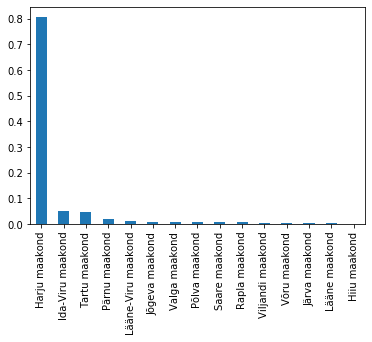

In [23]:
# Provinces
counts = koopia["MaakondNimetus"].value_counts()
counts = counts/sum(counts)
counts.plot(kind='bar')

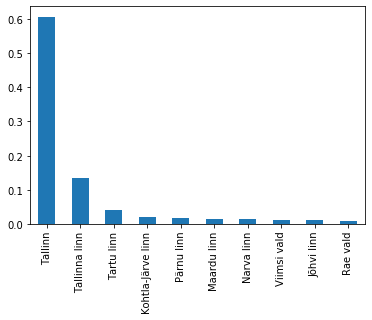

In [24]:
# Cities
counts = koopia["ValdLinnNimetus"].value_counts()
counts = counts/sum(counts)
counts[:10].plot(kind='bar')

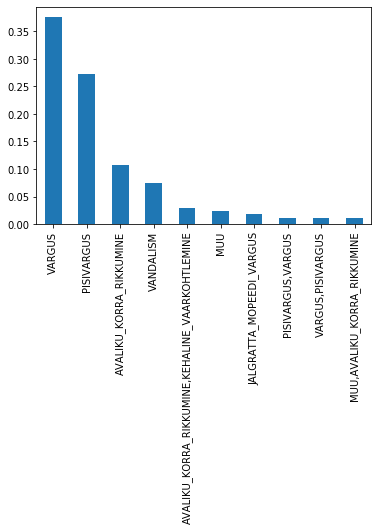

In [25]:
# Types of crimes
counts = koopia["SyndmusLiik"].value_counts()
counts = counts/sum(counts)
counts[:10].plot(kind='bar')

In [26]:
# How many cases for each year
koopia = data.copy()
kp = koopia.ToimKpv.values
for k in range(len(kp)):
    abi = kp[k]
    kp[k] = abi[:4]
counts = pd.value_counts(kp)
print(counts)
#counts = counts/sum(counts)
#ax = counts.plot(kind='bar')
#fig = ax.get_figure()
#fig.savefig('years.pdf', bbox_inches="tight")
#koopia = data.copy()

2014    11661
2015    11058
2016    10409
2017     8694
2018     7603
2019     6249
dtype: int64


In [27]:
# To check how many missing values these columns have
print(data["SyndmusLiik"].isnull().values.sum())
print(data["ToimKpv"].isnull().values.sum())
print(data["ToimKell"].isnull().values.sum())
print(data["MaakondNimetus"].isnull().values.sum())
print(data["ValdLinnNimetus"].isnull().values.sum())
print(data["Lest_X"].isnull().values.sum())
print(data["Lest_Y"].isnull().values.sum())

0
0
2232
165
165
529
529


In [28]:
data["SyndmusLiik"].loc[data["SyndmusLiik"].str.contains("AVALIKU_KORRA_RIKKUMINE")] = "AVALIKU_KORRA_RIKKUMINE"
data = data.dropna()
data.shape

(52800, 10)

In [29]:
# Some cases had multiple types of crimes. First one always seemed to be the main crime, so we decided to keep only the first on
# because it made working with the data easier.
values = data["SyndmusLiik"].unique()
for value in values:
    if(len(value.split(",")) > 1):
        data["SyndmusLiik"][data["SyndmusLiik"]==value] = value.split(",")[0]
data["SyndmusLiik"].value_counts()
data.shape

C:\Anaconda3\envs\IDS\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(52800, 10)

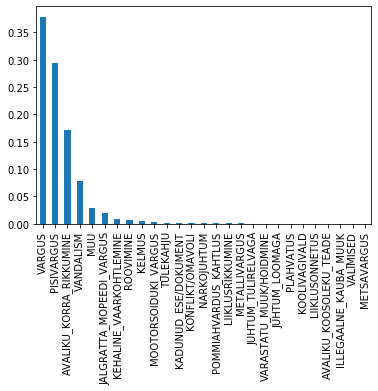

In [30]:
# Types of crimes
counts = data["SyndmusLiik"].value_counts()
counts = counts/sum(counts)
ax = counts.plot(kind='bar')

fig = ax.get_figure()
#fig.savefig('crimes.pdf', bbox_inches="tight")

In [31]:
data["ValdLinnNimetus"].unique()

array(['Tallinn', 'Valga linn', 'Tartu linn', 'Maardu linn', 'Elva vald',
       'Jõelähtme vald', 'Pärnu linn', 'Jõhvi linn', 'Rapla linn',
       'Narva linn', 'Väike-Maarja vald', 'Kuressaare linn',
       'Hiiumaa vald', 'Paide linn', 'Mulgi vald', 'Viimsi vald',
       'Elva linn', 'Põhja-Sakala vald', 'Tõrva vald',
       'Kohtla-Järve linn', 'Rae vald', 'Põlva linn', 'Viru-Nigula vald',
       'Lääne-Harju vald', 'Võru linn', 'Mustvee linn', 'Kose vald',
       'Tapa linn', 'Sindi linn', 'Kehra linn', 'Rakvere vald',
       'Räpina linn', 'Saku vald', 'Haapsalu linn', 'Paldiski linn',
       'Jõgeva linn', 'Viljandi vald', 'Anija vald', 'Lääne-Nigula vald',
       'Keila linn', 'Saue vald', 'Viljandi linn', 'Tori vald',
       'Sillamäe linn', 'Harku vald', 'Rakvere linn', 'Kärdla linn',
       'Põltsamaa linn', 'Jõgeva vald', 'Saue linn', 'Märjamaa vald',
       'Kiviõli linn', 'Kanepi vald', 'Vinni vald', 'Haljala vald',
       'Antsla linn', 'Kehtna vald', 'Kohila vald', 'Saa

In [32]:
#data.to_csv("data_of_all_years_with_cords_cleared.csv", index = None, header=True, encoding="utf-8-sig", date_format="%Y-%m-%d")

Separating years to different dataframes and writing to csv.

In [33]:
# Made data files containing only one certain year.

data2014only = data[data["ToimKpv"].str.contains("2014")]
#data2014only.to_csv("data2014only.csv", index = None, header=True, encoding="utf-8-sig", date_format="%Y-%m-%d")

data2015only = data[data["ToimKpv"].str.contains("2015")]
#data2015only.to_csv("data2015only.csv", index = None, header=True, encoding="utf-8-sig", date_format="%Y-%m-%d")

data2016only = data[data["ToimKpv"].str.contains("2016")]
#data2016only.to_csv("data2016only.csv", index = None, header=True, encoding="utf-8-sig", date_format="%Y-%m-%d")

data2017only = data[data["ToimKpv"].str.contains("2017")]
#data2017only.to_csv("data2017only.csv", index = None, header=True, encoding="utf-8-sig", date_format="%Y-%m-%d")

data2018only = data[data["ToimKpv"].str.contains("2018")]
#data2018only.to_csv("data2018only.csv", index = None, header=True, encoding="utf-8-sig", date_format="%Y-%m-%d")

data2019only = data[data["ToimKpv"].str.contains("2019")]
#data2019only.to_csv("data2019only.csv", index = None, header=True, encoding="utf-8-sig", date_format="%Y-%m-%d")


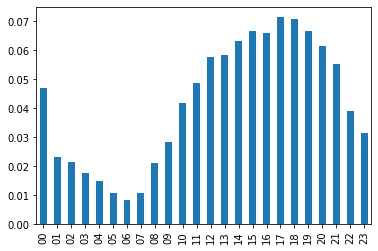

In [34]:
# Time of the crime
koopia = data.copy()
kp = koopia.ToimKell.values
for k in range(len(kp)):
    abi = kp[k]
    kp[k] = abi[:2]
counts = pd.value_counts(kp).sort_index()
counts = counts/sum(counts)
ax = counts.plot(kind='bar')
koopia = data.copy()
fig = ax.get_figure()
#fig.savefig('ToimKell.pdf', bbox_inches="tight")

In [35]:
print(str(((counts.get("00") - counts.get("23"))/counts.get("00"))*100))
print(str(((counts.get("00") - counts.get("01"))/counts.get("00"))*100))

32.996768982229405
50.56542810985461


From the plot above we can see that the lowest amount of crimes were commited at 06:00 - 06:59 and highest amount at 17:00 - 17:59. There is a lot more crime commited in the day rather than at night. The amount of crimes commited mostly increases at 07:00 - 17:59, with one very minor exception at 16:00 - 16:59. At 18:00 - 06:59 it mostly decreases, with one big exception being 00:00 - 00:59, where it is about 33% higher than the previous hour and about 51% higher than the next hour.

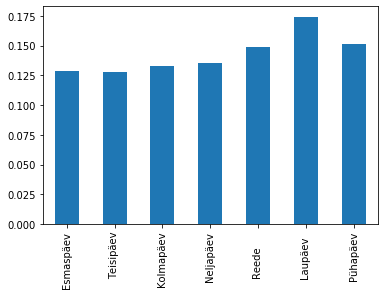

In [36]:
# Day of the week
koopia = data.copy(deep=True)
koopia["ToimNadalapaev"] = koopia["ToimNadalapaev"].astype("category").cat.reorder_categories(["Esmaspäev","Teisipäev","Kolmapäev","Neljapäev","Reede     ","Laupäev  ","Pühapäev"],ordered=True)
#print(koopia["ToimNadalapaev"].unique())
counts = koopia["ToimNadalapaev"].value_counts().sort_index()
counts = counts/sum(counts)
ax = counts.plot(kind='bar')
fig = ax.get_figure()
#fig.savefig('ToimNadalapaev.pdf', bbox_inches="tight")

From the plot above we can see that the most crimes are commited at saturday. Below that are friday and sunday, that are about equal and lowest are monday, tuesday, wednesday and thursday, that are also about equal. The highest increase is at saturday.

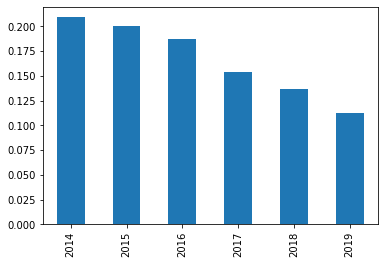

In [37]:
# Months
koopia = data.copy(deep=True)
kp = koopia.ToimKpv.values
for k in range(len(kp)):
    abi = kp[k]
    kp[k] = abi[:4]
counts = pd.value_counts(kp)
counts = counts/sum(counts)
counts.plot(kind='bar')

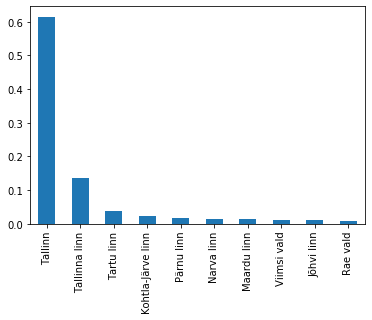

In [38]:
# Cities
koopia = data.copy(deep=True)
counts = koopia["ValdLinnNimetus"].value_counts()
counts = counts/sum(counts)
counts[:10].plot(kind='bar')

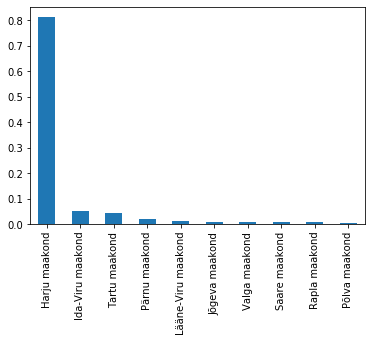

In [39]:
# Provinces
koopia = data.copy(deep=True)
counts = koopia["MaakondNimetus"].value_counts()
counts = counts/sum(counts)
counts[:10].plot(kind='bar')

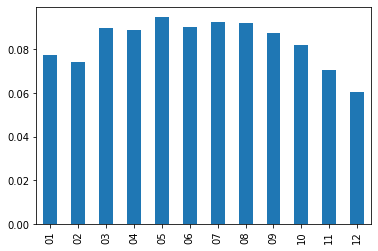

In [40]:
# Months
koopia = data.copy(deep=True)
kp = koopia.ToimKpv.values
for k in range(len(kp)):
    abi = kp[k]
    kp[k] = abi[5:7]
counts = pd.value_counts(kp).sort_index()
counts = counts/sum(counts)
ax = counts.plot(kind='bar')
fig = ax.get_figure()
#fig.savefig('ToimKpv.pdf', bbox_inches="tight")

We can see that most crime is commited in may and least in december. There also seems to be less crime from november to february.